# Pageviews per user on Wikibooks

→ [Go back to overview of all statistics](./index.html)

In [1]:
from datetime import datetime

print(f"Date of last update: {datetime.now().strftime('%d.%m.%Y, %H:%M')}")

Date of last update: 16.07.2025, 11:22


## Utility functions and imports

In [2]:
%load_ext jupyter_ai_magics

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [7]:
from IPython.display import display, Markdown


def md(text):
    display(Markdown(text))

In [17]:
import requests

http_client = requests.Session()
http_client.headers.update(
    {
        "User-Agent": f"MFNFBot/0.1 (https://github.com/kulla/analytics-mfnf; github.mail@kulla.me) requests/{requests.__version__}",
    }
)

In [18]:
import requests


def unique_devices(project, granularity, start, end):
    return http_client.get(
        f"https://wikimedia.org/api/rest_v1/metrics/unique-devices/{project}/all-sites/{granularity}/{start}/{end}"
    ).json()["items"]


unique_devices("de.wikibooks.org", "daily", "20160101", "20250630")[0]

{'project': 'de.wikibooks',
 'access-site': 'all-sites',
 'granularity': 'daily',
 'timestamp': '20160101',
 'devices': 32262,
 'offset': 19923,
 'underestimate': 12339}

In [21]:
import requests


def page_views(project, granularity, start, end):
    return http_client.get(
        f"https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/all-access/user/{granularity}/{start}/{end}"
    ).json()["items"]


page_views("de.wikibooks.org", "daily", "2016010100", "2025063000")[0]

{'project': 'de.wikibooks',
 'access': 'all-access',
 'agent': 'user',
 'granularity': 'daily',
 'timestamp': '2016010100',
 'views': 83844}

## Daily page views per unique device on de.wikibooks.org

### Line plot of ratio views-per-device

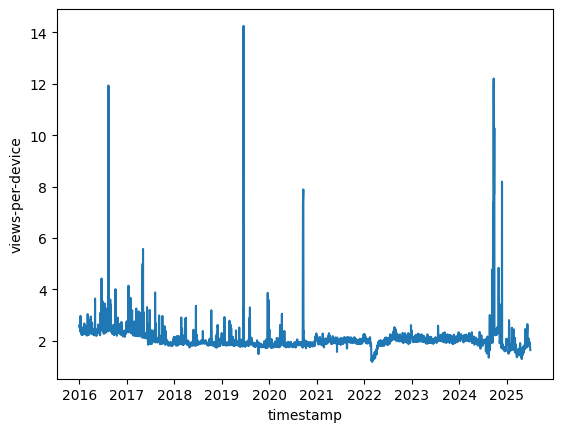

### Histogram

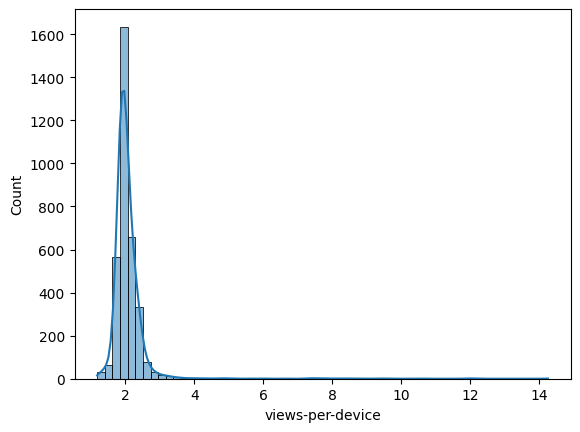

### Statistical description

count    3469.000000
mean        2.075491
std         0.638615
min         1.181052
25%         1.869535
50%         1.972856
75%         2.141880
max        14.246800
Name: views-per-device, dtype: float64

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def analyze(
    project="de.wikibooks.org", granularity="daily", start="20160101", end="20250630"
):
    devices = unique_devices(project, granularity, start, end)
    views = page_views(project, granularity, start, end)

    df = pd.DataFrame(
        {
            "timestamp": device["timestamp"],
            "devices": device["devices"],
            "views": view["views"],
        }
        for device, view in zip(devices, views)
    )

    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df.set_index("timestamp", inplace=True)

    df["views-per-device"] = df["views"] / df["devices"]

    md("### Line plot of ratio views-per-device")
    sns.lineplot(x=df.index, y="views-per-device", data=df)
    plt.show()

    md("### Histogram")
    sns.histplot(df["views-per-device"], kde=True, bins="sqrt")
    plt.show()

    md("### Statistical description")
    display(df["views-per-device"].describe())


analyze()

## Monthly page views per unique device on de.wikibooks.org

### Line plot of ratio views-per-device

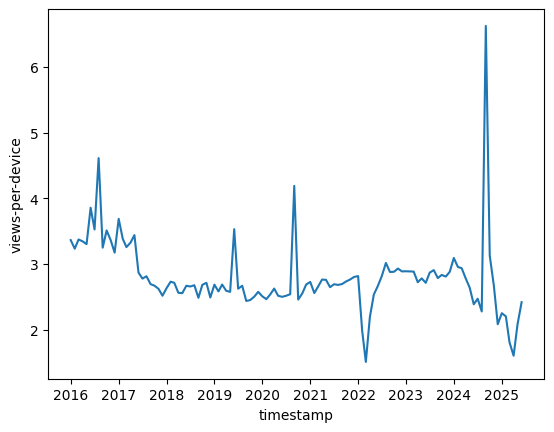

### Histogram

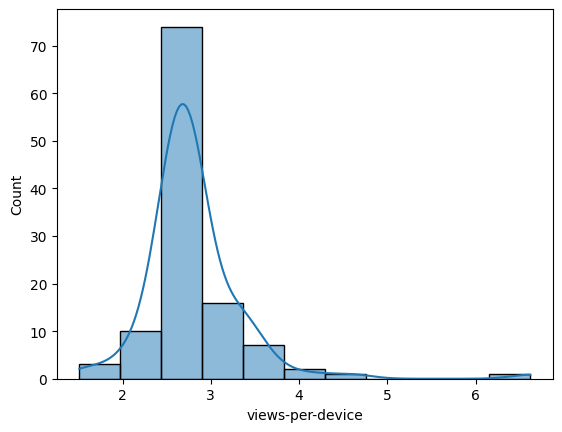

### Statistical description

count    114.000000
mean       2.803827
std        0.569532
min        1.511636
25%        2.553779
50%        2.695652
75%        2.888443
max        6.621581
Name: views-per-device, dtype: float64

In [38]:
analyze(granularity="monthly")

## License of this report

Copyright 2025 Stephan Kulla ("Kulla")

Licensed under the Apache License, Version 2.0 (the "Apache License") and Creative Commons Attribution 4.0 International (the "CC-BY License"). You may choose either of these licenses to govern your use of this project.

You may obtain a copy of the Apache License at:
    http://www.apache.org/licenses/LICENSE-2.0

You may obtain a copy of the CC-BY License at:
    https://creativecommons.org/licenses/by/4.0/

Unless required by applicable law or agreed to in writing, software and content distributed under the Apache License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the Apache License for the specific language governing permissions and limitations under the License.

Under the CC-BY License, you are free to share and adapt the material provided you give appropriate credit, provide a link to the license, and indicate if changes were made. See the CC-BY License for full details.

Third-Party Components and Licenses:
This product also includes third-party components which are distributed under their respective licenses. Please refer to the NOTICE file for details.